# Neural Networks - Exercises to Theory 1

# Importing Packages

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from typing import Mapping, List

# Perceptron

## Exercise 1.1 

Define the sigmoid function $\sigma(z) = \frac{1}{1+e^{-z}}$ and find the class (label) of the point 
$$\vec{x} = [0.5, 1.4, 2.0],$$ 
that is produced (as the output) by the perceptron model with the weights and bias
$$ \vec{w} = [0.4, 0.3, 0.2], \ \ w_0 = 1.5$$

Recall that the sigmoid function returns a probability. 

In [ ]:
def perceptron(
    x_vals: npt.ArrayLike,
    weights: npt.ArrayLike,
    bias: float, 
    activation_function: Mapping[float, int] 
    ) -> int:
    y = activation_function(np.dot(x_vals, weights) + bias)
    return y

In [ ]:
sigmoid = lambda z: 1/(1+np.exp(-z))
bias = 1.5
x_vals = np.array([0.5, -1.4, 2.0])
weights = np.array([0.4, 0.3, 0.2])

output = perceptron(x_vals, weights, bias, sigmoid)
if output>=0.5:
    print("class 1")
else:
    print("class 0")

class 1


# Training and Test Data Sets

## Exercise 1.2

Plot one feature of the ``tf.keras.datasets.boston_housing`` train data set against the corresponding target value. 

Use a scatter plot. 

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz",
    test_split=0.2
    )

65536/57026 [==================================] - 0s 0us/step


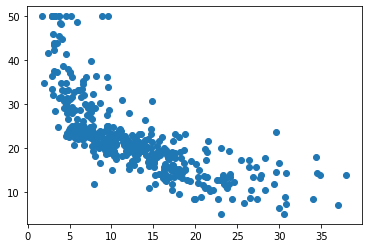

In [ ]:
plt.scatter(x_train[:, 12], y_train)
plt.show()

# Linear and Non_linear models

## Exercise 1.3

Define the XOR function in a Lambda (anonymous) Python function syntax 

In [ ]:
XOR = lambda x1, x2: 0 if x1==x2 else 1

print(XOR(1, 1))
print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))

0
0
1
1


# Building an artificial brain - Multilayer Perceptron (MLP)

## Exercise 1.4

Construct a Multilayer perceptron with any number of hidden layers. 

Your function should have the following inputs:

- ``x_vals: npt.ArrayLike, `` - input values;
- ``params_layers: List[List[npt.ArrayLike]]``, - weights and biases in all the layers
- ``sigma: Mapping[float, float]``, - activation function of hidden layers
- ``sigma_out: Mapping[float, float]`` - output activation function. 

Note that that in the corresponding example the params_layers would have the form
``params_layer = [params_layer1, params_layer2]``

Check if your function produces the right output from the example from the corresponding theory section. 


In [ ]:
def mlp(
    x_vals: npt.ArrayLike,
    params_layers: List[List[npt.ArrayLike]],
    sigma: Mapping[float, float],
    sigma_out: Mapping[float, float],
    ) -> npt.ArrayLike:
    z = x_vals[:]
    for W, b in params_layers[:-1]:
        z = sigma(W.T@z + b)
    W_out, b_out = params_layers[-1]
    y = sigma_out(W_out.T@z + b_out)
    return y

In [ ]:
x_vals = np.array([2., -1.])
W1 = np.array([[0.2, 0.3, 0.46], [0.2, 0.65, 0.27]])
W2 = np.array([[0.27], [0.3], [0.05]])
b1 = np.zeros(3)
b2 = np.zeros(1)
params_layer1 = [W1, b1]
params_layer2 = [W2, b2]
params_layer = [params_layer1, params_layer2]
sigma = lambda a: np.maximum(0, a)
sigma_out = lambda a: 1/(1+np.exp(-a))

In [ ]:
mlp(x_vals, params_layer, sigma, sigma_out)

array([0.52161153])

# How to implement the network in TensorFlow and Keras

## Exercise 1.5

Define a Sequential model that has the following architecture 


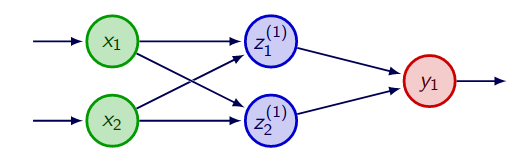

and the following weights and biases to the model

$$
W^{(1)} = \left[\begin{array}{ccc} 1.0 & 1.0 \\  1.0 & 1.0  \end{array} \right], 
W^{(2)} = \left[\begin{array}{c}1. \\ -2.  \end{array} \right],
 \vec{b}^{(1)} =  \left[\begin{array}{ccc} 0 \\ -1 \end{array}\right],\ 
\vec{b}^{(2)} = 0
$$
- The hidden activation function is ReLu, that is, $\sigma_1(a) = \max\{0, a\}$
- The output activation function is linear (identity). 


Show that this model reproduces the XOR function. 

In [ ]:
W1 = np.array([[1., 1.], [1., 1.]])
W2 = np.array([[1], [-2]])
b1 = np.array([0, -1])
b2 = np.zeros(1)
params_layer1 = [W1, b1]
params_layer2 = [W2, b2]
parameters =  params_layer1 + params_layer2

In [ ]:
mlp_model = tf.keras.Sequential(name="SimpleMLP")
mlp_model.add(tf.keras.layers.InputLayer(input_shape=(2), name="input"))
mlp_model.add(tf.keras.layers.Dense(units=2, activation="relu", name="hidden1"))
mlp_model.add(tf.keras.layers.Dense(units=1, activation="linear", name="output"))
mlp_model.set_weights(parameters)

In [ ]:
x_vals = [[0, 0], [1, 1], [1, 0], [0, 1]]

mlp_model.predict(x_vals)

array([[0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

# Training procedure

## Exercise 1.6

Apply gradient descent method so that it finds the minimum of the function 
$$E( \vec{w}) = \sin(w_1) + \cos(w_2),$$
where $\vec{w} = [w_1, w_2]$. 
The initial point is $\vec{w}_0 = [1, 2]$.

You have to select the right learning rate and the number of iterations. 

In [ ]:
def grad_descent(dE, w0, n, eta):
    wn = w0
    history = [wn]
    for _ in range(1, n):
        wn = wn - eta*dE(wn)
        history.append(wn)
    return history

In [ ]:
E = lambda w: np.sin(w[0]) + np.cos(w[1])
dE1 = lambda x: np.cos(x)
dE2 = lambda x: -np.sin(x)
dE =  lambda w: np.array([dE1(w[0]), dE2(w[1])])

eta = 0.1
w0 = [1, 2]
n = 100
vals = grad_descent(dE, w0, n, eta)
E(vals[-1])

-1.9999999726445419